<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico I - Estadística </h1>
<h3> Análisis y Visualización de Datos - 2019 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10. Usaremos una [versión ya limpia del dataset](https://www.kaggle.com/gsutters/the-human-freedom-index/home) que pueden descargar desde Kaggle.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con dos estimadores principales: *hf_score* que hace referencia a Human Freedom, y *ef_score* que hace referencia a Economic Freedom. Estos dos estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [3]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [4]:
seaborn.__version__

'0.9.0'

In [5]:
dataset = pandas.read_csv('./datasets/hfi_cc_2018.csv')
dataset.shape

(1458, 123)

In [6]:
dataset.columns  # Way too many columns!

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [8]:
important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [7]:
dataset[important_cols]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0
5,2016,AUS,Australia,Oceania,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250000,7.98,10.0,8.582219,4.0
6,2016,AUT,Austria,Western Europe,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,7.58,27.0,8.413474,16.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,6.49,106.0,6.083277,130.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,7.34,49.0,7.397269,50.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,0.0,0.0,0.0,10.0,10.0,10.0,0.0,3.333333,7.56,30.0,6.848035,75.0


## 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda? 
  3. ¿Son todos los valores de *pf_identity*  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?
  4. ¿Cómo pueden sanearse los valores faltantes?
  5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  
  

In [9]:
pf_media = dataset['pf_identity'].mean()
pf_ds = dataset['pf_identity'].std()
pf_mediana = dataset['pf_identity'].median()
print('media:'+ str(pf_media))
print('mediana:'+ str(pf_mediana))
print('ds:'+ str(pf_ds))


pf_media = dataset[dataset['region']=='Latin America & the Caribbean']['pf_identity'].mean()
pf_ds = dataset[dataset['region']=='Latin America & the Caribbean']['pf_identity'].std()
pf_mediana = dataset[dataset['region']=='Latin America & the Caribbean']['pf_identity'].median()
print('la-media:'+ str(pf_media))
print('la-mediana:'+ str(pf_mediana))
print('la-ds:'+ str(pf_ds))

media:7.33417997096807
mediana:9.166666667000001
ds:3.159472661477449
la-media:8.765086206909483
la-mediana:10.0
la-ds:1.7117319741534658


In [10]:
hf_media = dataset['hf_score'].mean()
hf_ds = dataset['hf_score'].std()
hf_mediana = dataset['hf_score'].median()
print('media:'+ str(hf_media))
print('mediana:'+ str(hf_mediana))
print('ds:'+ str(hf_ds))

hf_media = dataset[dataset['region']=='Latin America & the Caribbean']['hf_score'].mean()
hf_ds = dataset[dataset['region']=='Latin America & the Caribbean']['hf_score'].std()
hf_mediana = dataset[dataset['region']=='Latin America & the Caribbean']['hf_score'].median()
print('la-media:'+ str(hf_media))
print('la-mediana:'+ str(hf_mediana))
print('la-ds:'+ str(hf_ds))

media:6.9934437555145
mediana:6.923840432999999
ds:1.0258111611874141
la-media:7.047981929952582
la-mediana:7.02804474
la-ds:0.6089040915687837


No tiene sentido calcular la Moda de hf_score , ya que muchos valores se repiten la misma cantidad de veces en la distribucion. y la moda son los valores que mas veces se repiten.

El ef_score junto al pf_identity servirian para de alguna manera obtener el hf_score.

Se podrian sanear haciendo los valores faltantes iguales a la media?



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

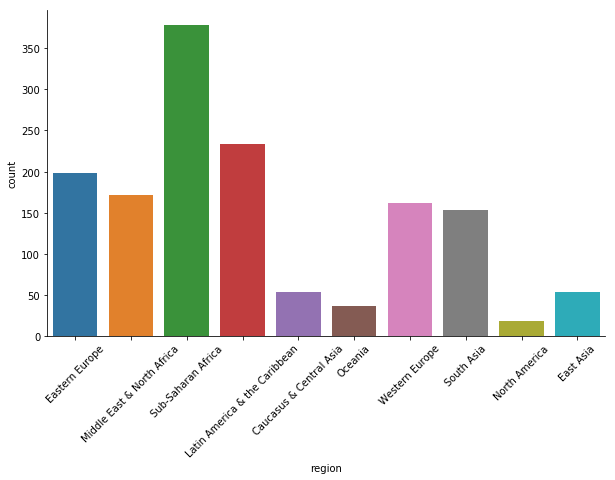

In [11]:
plt.figure(figsize=(10,6))
seaborn.countplot(data=dataset, x='region')
seaborn.despine()
plt.xticks(rotation=45)

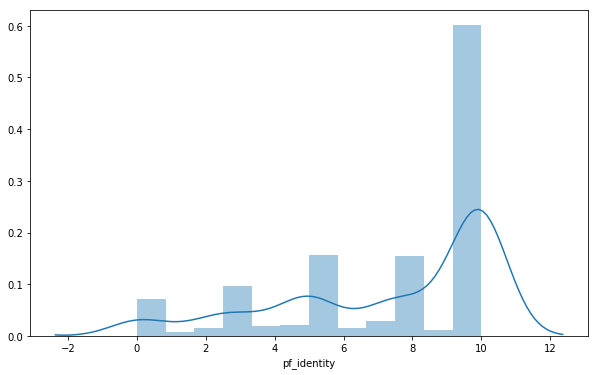

In [12]:
plt.figure(figsize=(10,6))
seaborn.distplot(dataset['pf_identity'].dropna())

In [13]:
dataset[dataset['pf_identity'] < 0].shape[0]

0

In [14]:
dataset[dataset['pf_identity'] > 10].shape[0]

0

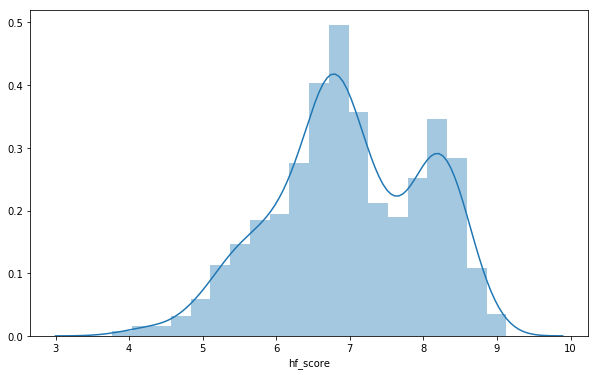

In [34]:
plt.figure(figsize=(10,6))
seaborn.distplot(dataset['hf_score'].dropna())

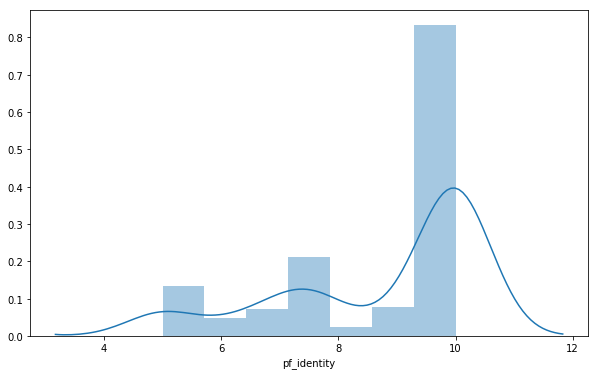

In [16]:
datos_la_pf = dataset[dataset['region']=='Latin America & the Caribbean']
plt.figure(figsize=(10,6))
seaborn.distplot(datos_la_pf['pf_identity'].dropna())

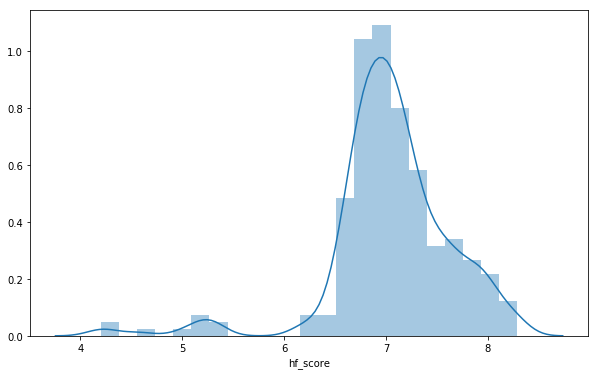

In [17]:
datos_la_hf = dataset[dataset['region']=='Latin America & the Caribbean']
plt.figure(figsize=(10,6))
seaborn.distplot(datos_la_hf['hf_score'].dropna())

In [18]:
datos_la_hf.shape[0]

234

In [19]:
datos_la_hf[datos_la_hf['hf_score'] < 5].shape[0]

3

In [20]:
datos_la_hf_score = datos_la_hf['hf_score']
# Eliminar filas a más de 2.5 desviaciones estándares de la media
mask_datos_la_hf_cor = numpy.abs(datos_la_hf_score-datos_la_hf_score.mean()) <= (2.5*datos_la_hf_score.std())
datos_la_hf_score_corr = datos_la_hf_score[mask_datos_la_hf_cor]
print("Filas removidas", datos_la_hf_score.count() - datos_la_hf_score_corr.count())
print("Hr_score máximo considerado", datos_la_hf_score_corr.max())

Filas removidas 9
Hr_score máximo considerado 8.290152327000001


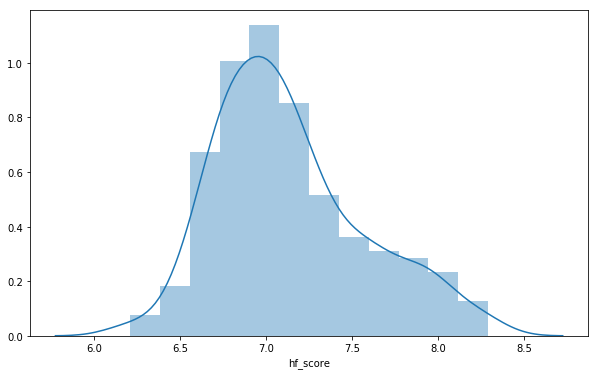

In [21]:

plt.figure(figsize=(10,6))
seaborn.distplot(datos_la_hf_score_corr.dropna())

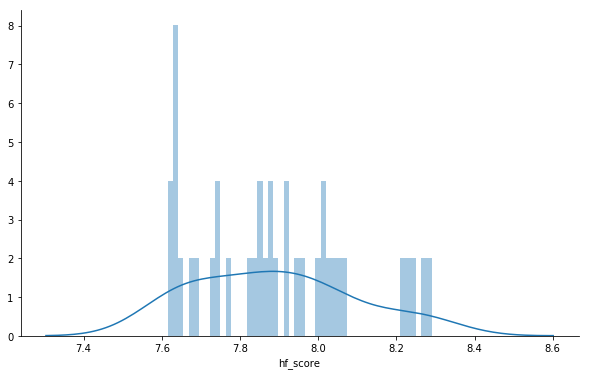

In [22]:
plt.figure(figsize=(10,6))
seaborn.distplot(datos_la_hf_score_corr[datos_la_hf_score_corr > 7.6], bins=50)
seaborn.despine()

In [23]:
datos_la_hf_score_corr[datos_la_hf_score_corr > 7.5]

31      8.008018
36      7.857714
114     7.647620
117     7.575393
156     7.728071
193     8.027501
198     7.882654
276     7.638484
279     7.615037
318     7.770347
355     8.017589
360     8.058857
438     7.583918
441     7.547980
480     7.736980
517     7.994038
522     7.856514
600     7.549042
642     7.876803
656     7.580937
679     8.219911
684     7.890738
762     7.534258
765     7.630991
804     7.959078
818     7.631374
841     8.290152
846     7.919855
927     7.683067
966     8.041428
980     7.637069
1003    8.271367
1008    7.682004
1089    7.619559
1128    8.073788
1142    7.745258
1165    8.249136
1170    7.817826
1248    7.518632
1251    7.541655
1290    7.925409
1304    7.863355
1327    8.227215
1332    7.832944
1452    7.947847
Name: hf_score, dtype: float64

## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.
2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Hint: hay un gráfico de seaborn que hace todo por vos!

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

No handles with labels found to put in legend.


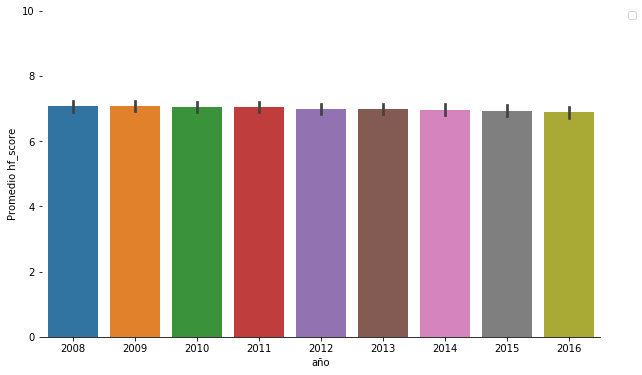

In [24]:
plt.figure(figsize=(10,6))
seaborn.barplot(data=dataset[important_cols], x='year', y='hf_score')         
plt.ylabel('Promedio hf_score')
plt.xlabel('año')
plt.ylim(0, 10)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine(left=True)

No handles with labels found to put in legend.


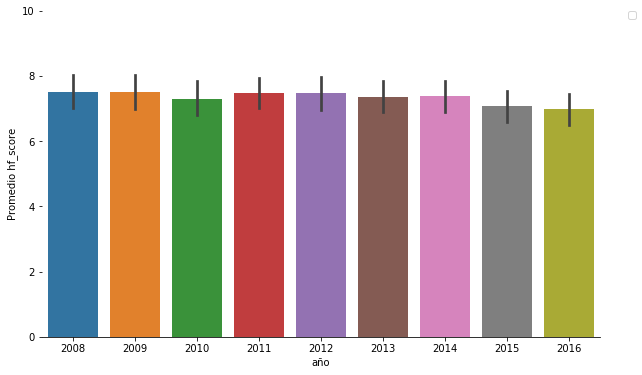

In [25]:
plt.figure(figsize=(10,6))
seaborn.barplot(data=dataset[important_cols], x='year', y='pf_identity')         
plt.ylabel('Promedio hf_score')
plt.xlabel('año')
plt.ylim(0, 10)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine(left=True)

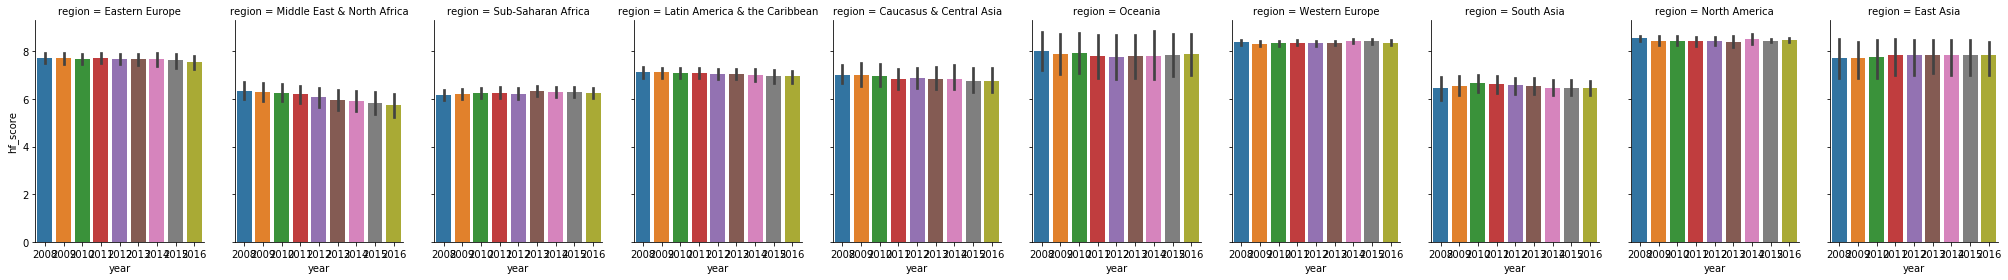

In [169]:
seaborn.catplot(
    'year', 'hf_score', data=dataset[important_cols], col="region",
     kind="bar", height=4, aspect=.7)
seaborn.despine()

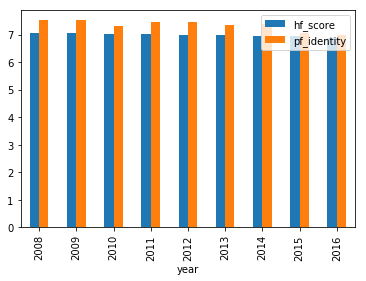

In [170]:
df = dataset[important_cols].groupby(['year'])['hf_score','pf_identity'].mean()

df.plot.bar()



In [136]:
ds1=dataset[important_cols].groupby(['region']).mean()
ds1

,year,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
region,,,,,,,,,,,,,,
Caucasus & Central Asia,2012,5.600000,9.166667,9.166667,9.134615,9.423077,9.423077,9.423077,6.666667,8.714744,7.030577,65.750000,6.879506,85.076923
East Asia,2012,7.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.861111,7.535000,42.018519,7.813020,43.796296
Eastern Europe,2012,7.511628,9.842520,9.842520,9.815789,9.921053,9.921053,9.921053,9.444444,9.683333,7.104474,60.615789,7.671637,46.510526
Latin America & the Caribbean,2012,3.850000,8.933333,9.333333,9.282511,7.974138,9.224138,8.599138,10.000000,8.765086,6.734871,78.267241,7.047982,72.318966
Middle East & North Africa,2012,7.000000,2.242991,2.990654,2.900000,2.400000,3.200000,2.800000,2.191781,2.830000,6.557000,88.506667,6.051464,115.700000
North America,2012,7.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.833333,7.956667,8.500000,8.461915,12.000000
Oceania,2012,7.000000,8.750000,9.583333,9.444444,7.500000,10.000000,8.750000,10.000000,9.152778,7.484722,45.250000,7.858762,39.444444
South Asia,2012,5.357143,5.161290,5.567010,5.588235,4.661654,7.279412,6.029412,5.238095,5.735294,6.655809,90.382353,6.533740,99.323529
Sub-Saharan Africa,2012,6.000000,5.565217,6.261062,5.348665,4.051724,6.465517,5.258621,7.128378,5.567050,6.135259,111.247126,6.256850,110.752874


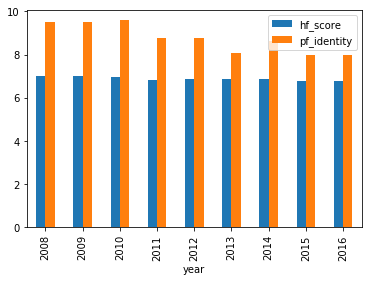

In [143]:
dataset_r= dataset[important_cols]
df = dataset_r[dataset_r['region']=='Caucasus & Central Asia'].groupby(['year'])['hf_score','pf_identity'].mean()

df.plot.bar()



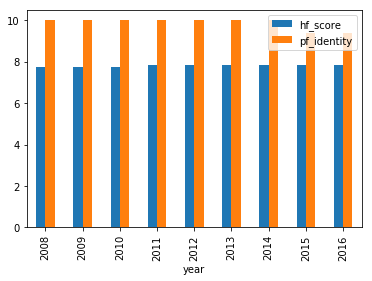

In [144]:
dataset_r= dataset[important_cols]
df = dataset_r[dataset_r['region']=='East Asia'].groupby(['year'])['hf_score','pf_identity'].mean()

df.plot.bar()

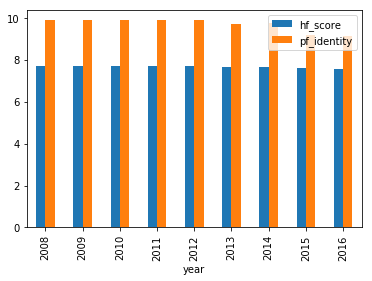

In [145]:
dataset_r= dataset[important_cols]
df = dataset_r[dataset_r['region']=='Eastern Europe'].groupby(['year'])['hf_score','pf_identity'].mean()

df.plot.bar()


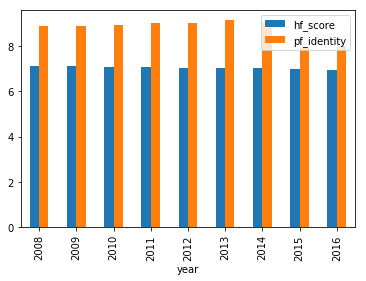

In [146]:
dataset_r= dataset[important_cols]
df = dataset_r[dataset_r['region']=='Latin America & the Caribbean'].groupby(['year'])['hf_score','pf_identity'].mean()

df.plot.bar()


## 2. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?
  2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.
  3. Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar a,bas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.
  4. Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

## 3. Correlaciones

En este ejercicio queremos responder a las preguntas

* Las libertades sociales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades individuales y respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, hf_score y ef_score. 

Como pf_indentity contribuye al cálculo de hf_score y ef_score, esperamos hallar algún grado de correlación. Sin embargo, queremos medir qué tanta correlación. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.
3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros)


/home/manuel/anaconda3/envs/diplodatos/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/manuel/anaconda3/envs/diplodatos/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


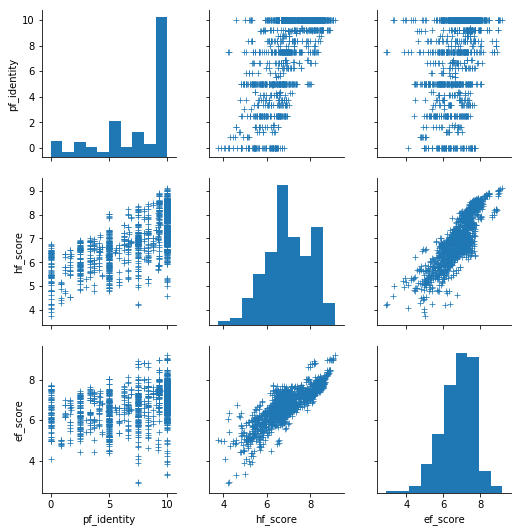

In [36]:

seaborn.pairplot(
    data=dataset[important_cols],
    vars=['pf_identity', 'hf_score', 'ef_score'],
    
    markers='+')